pandas: Digunakan untuk manipulasi dan analisis data.
numpy: Digunakan untuk operasi numerik.
train_test_split: Fungsi dari Scikit-Learn untuk membagi dataset menjadi data pelatihan dan pengujian.
MinMaxScaler: Untuk menskalakan data ke dalam rentang [0, 1].
Sequential, Dense: Komponen dari Keras untuk membangun model jaringan saraf.
Adam: Optimizer untuk pelatihan model.

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


# Assuming the dataset is named 'TikTok_songs_2020.csv'
data = pd.read_csv


## Mengatasi Bentrokan Nama dan Memuat Dataset

Jika sebelumnya terdapat bentrokan nama yang mungkin disebabkan oleh definisi variabel yang tidak diinginkan, kita dapat menghapus variabel `data` yang sudah ada dengan menggunakan perintah `del data`. Selanjutnya, kita perlu memuat ulang dataset dari file CSV dengan perintah `data = pd.read_csv('TikTok_songs_2020.csv')`. Untuk memastikan bahwa dataset telah dimuat dengan benar sebagai DataFrame, kita dapat menggunakan `print(type(data))`, yang seharusnya mengembalikan hasil `<class 'pandas.core.frame.DataFrame'>`. Dengan langkah-langkah ini, kita menjamin bahwa tidak ada konflik dalam penamaan variabel dan dataset kita siap untuk dianalisis lebih lanjut.


In [6]:
# Jika sebelumnya ada bentrokan nama, coba hapus variabel data yang mungkin mendefinisikan fungsi
del data

# Muat ulang dataset dari file CSV
data = pd.read_csv('TikTok_songs_2020.csv')

# Pastikan dataset dimuat sebagai DataFrame
print(type(data))  # Harusnya <class 'pandas.core.frame.DataFrame'>


<class 'pandas.core.frame.DataFrame'>


## Memilih Fitur dan Memisahkan Dataset

Dalam tahap ini, kita akan memilih fitur numerik yang relevan untuk model dari dataset. Fitur yang dipilih meliputi: `artist_pop`, `danceability`, `energy`, `loudness`, `mode`, `key`, `speechiness`, `acousticness`, `instrumentalness`, `liveness`, `valence`, `tempo`, `time_signature`, dan `duration_ms`. Target yang ingin kita prediksi adalah `track_pop`. Selanjutnya, kita memisahkan dataset menjadi dua bagian: fitur (X) dan target (y) dengan menggunakan `X = data[features].values` untuk mendapatkan nilai dari fitur yang telah dipilih, dan `y = data[target].values` untuk mendapatkan nilai dari target. Dengan langkah ini, kita sudah siap untuk melanjutkan ke tahap pelatihan model.


In [7]:
# Memilih fitur numerik yang relevan untuk model
features = ['artist_pop', 'danceability', 'energy', 'loudness', 'mode', 'key',
            'speechiness', 'acousticness', 'instrumentalness', 'liveness',
            'valence', 'tempo', 'time_signature', 'duration_ms']
target = 'track_pop'

# Memisahkan dataset menjadi fitur (X) dan target (y)
X = data[features].values
y = data[target].values


## Normalisasi dan Pembagian Dataset

Pada tahap ini, kita melakukan normalisasi fitur menggunakan `MinMaxScaler` dari Scikit-Learn, yang akan mengubah skala fitur menjadi rentang antara 0 hingga 1. Setelah itu, kita membagi dataset menjadi set pelatihan dan pengujian dengan proporsi 80% untuk pelatihan dan 20% untuk pengujian menggunakan `train_test_split`. Variabel `X_train` dan `X_val` akan berisi fitur yang telah dinormalisasi, sementara `y_train` dan `y_val` akan berisi target. Untuk mengonversi `track_pop` menjadi masalah klasifikasi biner (populer/tidak populer), kita menggunakan `np.where` untuk menetapkan nilai 1 jika `track_pop` lebih besar atau sama dengan 70, dan 0 jika kurang dari 70. Terakhir, kita memeriksa bentuk data dengan `X_train.shape`, `X_val.shape`, `y_train.shape`, dan `y_val.shape` untuk memastikan bahwa pembagian data telah dilakukan dengan benar.


In [8]:
# Normalisasi fitur menggunakan MinMaxScaler untuk skala 0 sampai 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Membagi dataset menjadi set pelatihan dan pengujian (80% pelatihan, 20% pengujian)
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Mengonversi 'track_pop' menjadi masalah klasifikasi biner (populer/tidak populer)
y_train = np.where(y_train >= 70, 1, 0)
y_val = np.where(y_val >= 70, 1, 0)

# Periksa bentuk data
X_train.shape, X_val.shape, y_train.shape, y_val.shape


((233, 14), (59, 14), (233,), (59,))

## Membangun dan Mengompilasi Model Jaringan Saraf

Dalam langkah ini, kita akan membangun model jaringan saraf menggunakan arsitektur Sequential dari Keras. Model terdiri dari input layer dengan 64 neuron dan fungsi aktivasi ReLU, diikuti oleh dua hidden layer, di mana hidden layer kedua memiliki 32 neuron dengan fungsi aktivasi yang sama. Sebagai output layer, kita menggunakan satu neuron dengan fungsi aktivasi sigmoid untuk melakukan klasifikasi biner. Setelah menambahkan layer, kita mengompilasi model dengan optimizer Adam dengan laju pembelajaran 0.001 dan menggunakan binary crossentropy sebagai fungsi loss, serta mengukur akurasi sebagai metrik. Terakhir, kita menggunakan `model.summary()` untuk melihat ringkasan arsitektur model yang telah dibangun, yang mencakup informasi tentang jumlah parameter dan struktur layer.


In [9]:

# Membangun model Sequential
model = Sequential()

# Input layer dan dua hidden layer
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))

# Output layer (klasifikasi biner)
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Lihat ringkasan model
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,073 (12.00 KB)

 Trainable params: 3,073 (12.00 KB)

 Non-trainable params: 0 (0.00 B)

## Melatih Model

Setelah membangun dan mengompilasi model, kita melanjutkan dengan melatih model menggunakan data pelatihan. Kita menggunakan metode `fit()` untuk melakukan pelatihan pada model dengan `X_train` sebagai fitur dan `y_train` sebagai target. Proses pelatihan dilakukan selama 50 epoch dengan ukuran batch 16. Selain itu, kita juga memberikan data validasi `(X_val, y_val)` untuk memantau kinerja model pada data yang belum pernah dilihat selama pelatihan. Parameter `verbose=1` digunakan untuk menampilkan progres pelatihan di konsol. Proses ini akan membantu kita mengevaluasi seberapa baik model belajar dari data pelatihan dan bagaimana kinerjanya pada data validasi.


In [10]:
# Latih model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_val, y_val), verbose=1)


Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.5023 - loss: 0.6929 - val_accuracy: 0.5932 - val_loss: 0.6845
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5756 - loss: 0.6806 - val_accuracy: 0.5932 - val_loss: 0.6760
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5793 - loss: 0.6680 - val_accuracy: 0.5932 - val_loss: 0.6677
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6333 - loss: 0.6462 - val_accuracy: 0.5932 - val_loss: 0.6566
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5753 - loss: 0.6616 - val_accuracy: 0.6271 - val_loss: 0.6490
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6023 - loss: 0.6454 - val_accuracy: 0.6271 - val_loss: 0.6400
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6541 - loss: 0.6184 - val_accuracy: 0.6271 - val_loss: 0.6320
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6543 - loss: 0.6313 - val_accuracy: 0.6441 - val_loss

## Visualisasi Akurasi dan Loss Model

Setelah melatih model, kita dapat menganalisis kinerja model dengan memvisualisasikan akurasi dan loss selama proses pelatihan. Menggunakan pustaka `matplotlib`, kita pertama-tama memplot akurasi pelatihan dan validasi dengan `plt.plot(history.history['accuracy'])` untuk akurasi pelatihan dan `plt.plot(history.history['val_accuracy'])` untuk akurasi validasi. Grafik ini membantu kita memahami bagaimana model belajar seiring dengan bertambahnya epoch. Kemudian, kita melakukan hal yang sama untuk loss dengan memplot `history.history['loss']` dan `history.history['val_loss']`. Judul dan label sumbu ditambahkan untuk memberikan konteks, dan legenda digunakan untuk membedakan antara data pelatihan dan validasi. Grafik-grafik ini memberikan wawasan penting tentang seberapa baik model kita bekerja dan apakah terdapat tanda-tanda overfitting atau underfitting.


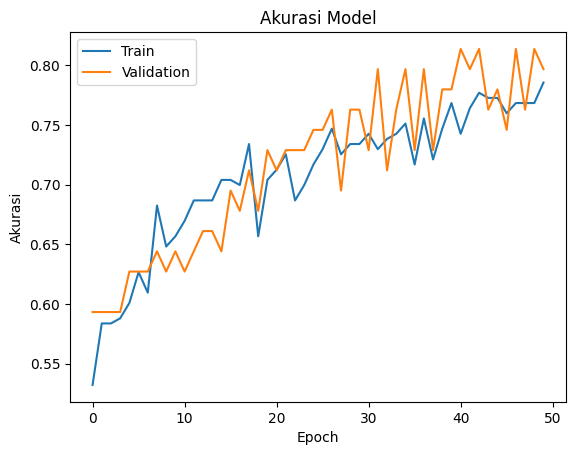

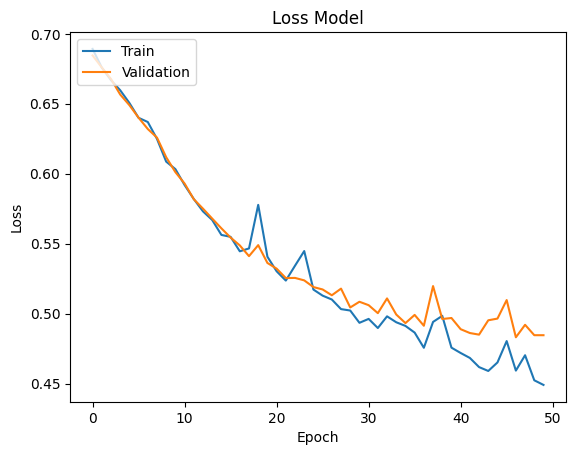

In [11]:
import matplotlib.pyplot as plt

# Plot akurasi pelatihan dan validasi
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('Akurasi')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot loss pelatihan dan validasi
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


## Evaluasi Model Menggunakan Confusion Matrix dan Classification Report

Setelah melatih model, langkah selanjutnya adalah mengevaluasi kinerja model pada data validasi. Kita mulai dengan melakukan prediksi pada `X_val` menggunakan `model.predict(X_val)` dan mengonversi hasil prediksi menjadi kelas biner dengan threshold 0.5 menggunakan `(model.predict(X_val) > 0.5).astype("int32")`. Selanjutnya, kita menghitung confusion matrix dengan menggunakan `confusion_matrix(y_val, y_pred)`, yang memberikan gambaran tentang jumlah prediksi yang benar dan salah untuk setiap kelas. Selain itu, kita juga menghasilkan classification report dengan `classification_report(y_val, y_pred)`, yang memberikan metrik penting seperti precision, recall, dan F1-score. Laporan ini membantu kita menilai seberapa baik model dalam mengklasifikasikan kelas populer dan tidak populer, serta memberikan wawasan yang lebih dalam mengenai kinerja model secara keseluruhan.


In [12]:
from sklearn.metrics import classification_report, confusion_matrix

# Prediksi pada data validasi
y_pred = (model.predict(X_val) > 0.5).astype("int32")

# Confusion Matrix
print(confusion_matrix(y_val, y_pred))

# Classification Report untuk melihat precision, recall, f1-score
print(classification_report(y_val, y_pred))


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
[[29  6]
 [ 6 18]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        35
           1       0.75      0.75      0.75        24

    accuracy                           0.80        59
   macro avg       0.79      0.79      0.79        59
weighted avg       0.80      0.80      0.80        59



## Membangun Model Baru dengan Lebih Banyak Hidden Layer

Pada tahap ini, kita akan membangun model baru dengan arsitektur yang lebih dalam untuk meningkatkan kemampuannya dalam mempelajari pola dari data. Model ini terdiri dari beberapa hidden layer, dimulai dengan input layer yang memiliki 128 neuron dan fungsi aktivasi ReLU, diikuti oleh dua hidden layer tambahan dengan 64 dan 32 neuron, masing-masing juga menggunakan fungsi aktivasi ReLU. Output layer tetap memiliki satu neuron dengan fungsi aktivasi sigmoid untuk klasifikasi biner. Setelah menambahkan layer, kita mengompilasi model dengan optimizer Adam, tetapi kali ini menggunakan learning rate yang lebih kecil, yaitu 0.0005, untuk memungkinkan pelatihan yang lebih halus dan mengurangi risiko overshooting selama optimasi. Dengan pendekatan ini, kita berharap dapat memperoleh model yang lebih baik dalam menangkap kompleksitas dari dataset.


In [13]:
# Membangun model baru dengan lebih banyak hidden layer
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile model dengan Adam optimizer dan learning rate yang berbeda
model.compile(optimizer=Adam(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Memperbarui TensorFlow

Sebelum melanjutkan dengan pelatihan model, penting untuk memastikan bahwa kita menggunakan versi terbaru dari TensorFlow untuk memanfaatkan fitur-fitur terbaru dan perbaikan bug. Kita dapat memperbarui TensorFlow dengan menggunakan perintah `!pip install --upgrade tensorflow`. Perintah ini akan memeriksa versi terbaru TensorFlow yang tersedia dan menginstalnya, memastikan bahwa lingkungan pengembangan kita diperbarui dan kompatibel dengan kode yang akan kita jalankan. Memperbarui paket perangkat lunak secara berkala adalah praktik yang baik dalam pengembangan perangkat lunak untuk menjaga performa dan stabilitas.


In [19]:
!pip install --upgrade tensorflow


## Cross-Validation dengan Stratified K-Fold

Dalam upaya untuk mengevaluasi model secara lebih robust, kita menggunakan teknik cross-validation dengan `StratifiedKFold`. Pertama, kita mengimpor pustaka yang diperlukan, termasuk `StratifiedKFold` dari Scikit-Learn untuk membagi dataset dengan stratifikasi dan `accuracy_score` untuk menghitung akurasi. Kita kemudian mendefinisikan fungsi `create_model()` yang akan membangun model jaringan saraf baru setiap kali dipanggil, dengan arsitektur yang mencakup dua hidden layer dan dioptimalkan menggunakan Adam. Selanjutnya, kita menginisialisasi `StratifiedKFold` dengan 5 split dan mengacak data. Dalam setiap iterasi cross-validation, kita membagi data menjadi set pelatihan dan validasi, melatih model menggunakan data pelatihan, dan kemudian mengevaluasi akurasi pada data validasi. Hasil akurasi untuk setiap fold disimpan dalam daftar `acc_scores`. Setelah semua fold selesai, kita menghitung dan menampilkan rata-rata akurasi dan deviasi standar dari hasil cross-validation, memberikan gambaran yang lebih jelas tentang kinerja model di berbagai subset data.


In [22]:
# Import library yang diperlukan
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

# Definisikan ulang model menggunakan fungsi
def create_model():
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Gunakan StratifiedKFold untuk cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# List untuk menyimpan akurasi dari setiap fold
acc_scores = []

# Melakukan cross-validation
for train_index, val_index in kfold.split(X_scaled, np.where(y >= 70, 1, 0)):
    X_train_fold, X_val_fold = X_scaled[train_index], X_scaled[val_index]
    y_train_fold, y_val_fold = np.where(y[train_index] >= 70, 1, 0), np.where(y[val_index] >= 70, 1, 0)

    model = create_model()  # Buat model baru untuk setiap fold
    model.fit(X_train_fold, y_train_fold, epochs=50, batch_size=16, verbose=0)

    # Evaluasi model pada data validasi
    y_val_pred = (model.predict(X_val_fold) > 0.5).astype("int32")
    acc = accuracy_score(y_val_fold, y_val_pred)
    acc_scores.append(acc)

# Menampilkan hasil
print(f"Cross-Validation Accuracy: {np.mean(acc_scores) * 100:.2f}% (+/- {np.std(acc_scores) * 100:.2f}%)")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Cross-Validation Accuracy: 68.84% (+/- 6.71%)


## Visualisasi Matriks Kebingungan

Setelah melakukan evaluasi model, langkah selanjutnya adalah menghitung dan memvisualisasikan matriks kebingungan untuk memahami kinerja model dalam klasifikasi. Kita menggunakan `confusion_matrix` dari Scikit-Learn untuk menghitung matriks kebingungan berdasarkan prediksi model pada data validasi terakhir. Dengan menggunakan seaborn dan matplotlib, kita membuat heatmap untuk memvisualisasikan matriks kebingungan tersebut. Heatmap ini akan menunjukkan jumlah prediksi untuk setiap kombinasi kelas aktual dan prediksi, dengan label sumbu X dan Y masing-masing sebagai "Tidak Populer" dan "Populer". Dengan `plt.figure(figsize=(8, 6))`, kita mengatur ukuran visualisasi, dan menambahkan anotasi pada setiap sel matriks dengan `annot=True` untuk menunjukkan nilai numerik. Judul dan label sumbu ditambahkan untuk memberikan konteks. Visualisasi ini membantu kita menganalisis seberapa baik model dalam mengklasifikasikan kedua kategori dan mengidentifikasi area di mana model mungkin perlu ditingkatkan.


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


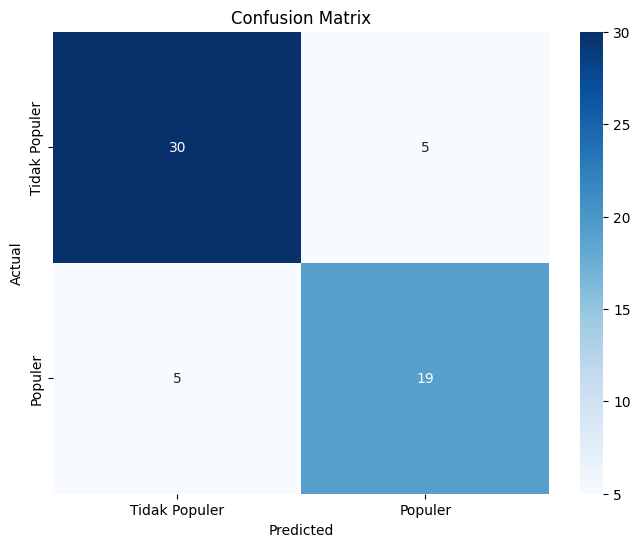

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Hitung matriks kebingungan pada data validasi terakhir
y_val_pred = (model.predict(X_val) > 0.5).astype("int32")
cm = confusion_matrix(y_val, y_val_pred)

# Visualisasi matriks kebingungan
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Tidak Populer", "Populer"], yticklabels=["Tidak Populer", "Populer"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


## Menyimpan Model dan Scaler

Setelah model dilatih dan dievaluasi, penting untuk menyimpan model dan scaler agar dapat digunakan di masa mendatang tanpa perlu melatih ulang. Kita menyimpan model dalam format Keras menggunakan `model.save('tiktok_song_popularity_model.keras')`, yang menyimpan arsitektur model, bobot, dan konfigurasi dalam satu file. Selain itu, kita juga menyimpan scaler yang telah digunakan untuk menormalkan fitur dengan menggunakan `joblib.dump(scaler, 'scaler.pkl')`. Dengan menyimpan scaler, kita memastikan bahwa data baru yang akan diprediksi di masa mendatang dapat dinormalisasi dengan cara yang sama, sehingga hasil prediksi model tetap konsisten dan akurat. Praktik ini sangat berguna dalam alur kerja machine learning untuk memastikan reusabilitas dan efisiensi.


In [25]:
# Menyimpan model dan scaler
model.save('tiktok_song_popularity_model.keras')  # Simpan model dalam format Keras
import joblib
joblib.dump(scaler, 'scaler.pkl')  # Simpan scaler menggunakan joblib


['scaler.pkl']

## Menyimpan Model dan Scaler

Setelah menyelesaikan pelatihan dan evaluasi model, langkah penting berikutnya adalah menyimpan model dan scaler untuk penggunaan di masa mendatang. Kita menyimpan model dalam format HDF5 menggunakan `model.save('tiktok_song_popularity_model.h5')`, yang menyimpan arsitektur, bobot, dan konfigurasi model dalam satu file. Format HDF5 sangat umum digunakan untuk menyimpan model Keras karena efisiensinya dalam menyimpan data besar. Selain itu, kita menggunakan `joblib.dump(scaler, 'scaler.pkl')` untuk menyimpan scaler yang telah digunakan untuk menormalkan fitur. Menyimpan scaler memungkinkan kita untuk menerapkan transformasi yang sama pada data baru yang akan diprediksi, sehingga menjaga konsistensi dan akurasi hasil prediksi model. Proses ini memastikan bahwa kita dapat dengan mudah memuat model dan scaler di lain waktu tanpa perlu melatih ulang model dari awal.


In [24]:
# Menyimpan model dan scaler
model.save('tiktok_song_popularity_model.h5')
import joblib
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

## Memuat Model dan Scaler

Setelah model dan scaler disimpan, langkah selanjutnya adalah memuat kembali keduanya untuk digunakan dalam prediksi di masa mendatang. Kita menggunakan `load_model('tiktok_song_popularity_model.keras')` dari Keras untuk memuat model yang telah disimpan sebelumnya. Proses ini mengembalikan arsitektur, bobot, dan konfigurasi model sehingga kita dapat langsung menggunakannya untuk membuat prediksi tanpa perlu melatih ulang. Selain itu, kita juga memuat scaler dengan menggunakan `joblib.load('scaler.pkl')`, yang memungkinkan kita untuk menerapkan transformasi yang sama pada data baru. Dengan langkah-langkah ini, kita siap untuk melakukan prediksi dengan model yang sudah terlatih dan distandarisasi sesuai dengan data yang telah diproses sebelumnya.


In [29]:
from tensorflow.keras.models import load_model
import joblib

# Memuat model
model = load_model('tiktok_song_popularity_model.keras')

# Memuat scaler
scaler = joblib.load('scaler.pkl')


## Proses Pelatihan Model Jaringan Saraf untuk Memprediksi Popularitas Lagu

Dalam langkah ini, kita memilih fitur numerik yang relevan untuk model dari dataset, termasuk atribut seperti `artist_pop`, `danceability`, `energy`, dan lainnya, dengan `track_pop` sebagai target. Dataset kemudian dipisahkan menjadi fitur (X) dan target (y), di mana fitur dinormalisasi menggunakan `MinMaxScaler` untuk mengubah nilai ke dalam rentang 0 hingga 1. Setelah normalisasi, dataset dibagi menjadi set pelatihan dan pengujian dengan perbandingan 80% untuk pelatihan dan 20% untuk pengujian. Target dikonversi menjadi masalah klasifikasi biner, di mana lagu dianggap populer jika `track_pop` bernilai 70 atau lebih. Selanjutnya, model jaringan saraf dibangun menggunakan arsitektur Sequential dengan satu input layer dan dua hidden layer, diakhiri dengan output layer yang menggunakan fungsi aktivasi sigmoid untuk klasifikasi biner. Model kemudian dikompilasi dengan optimizer Adam dan binary crossentropy sebagai fungsi loss. Setelah model dibangun, ringkasan model ditampilkan dengan `model.summary()`. Proses pelatihan dilakukan selama 50 epoch dengan ukuran batch 16, dan data validasi digunakan untuk memantau akurasi model. Setelah pelatihan, grafik akurasi dan loss diplot untuk visualisasi performa model. Terakhir, model dievaluasi pada data pelatihan dan validasi untuk menghitung akurasi masing-masing, yang memberikan gambaran tentang seberapa baik model belajar dari data dan seberapa efektif model dalam memprediksi popularitas lagu.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_37 (Dense)                     │ (None, 64)                  │             960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,073 (12.00 KB)

 Trainable params: 3,073 (12.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.4781 - loss: 0.6938 - val_accuracy: 0.5932 - val_loss: 0.6621
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5841 - loss: 0.6656 - val_accuracy: 0.5932 - val_loss: 0.6559
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6014 - loss: 0.6453 - val_accuracy: 0.5932 - val_loss: 0.6464
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6001 - loss: 0.6454 - val_accuracy: 0.6102 - val_loss: 0.6386
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5985 - loss: 0.6396 - val_accuracy: 0.6102 - val_loss: 0.6304
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6319 - loss: 0.6257 - val_accuracy: 0.6102 - val_loss: 0.6216
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5934 - loss: 0.6370 - val_accuracy: 0.6949 - val_loss: 0.6129
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6041 - loss: 0.6233 - val_accuracy: 0.6102 - val_

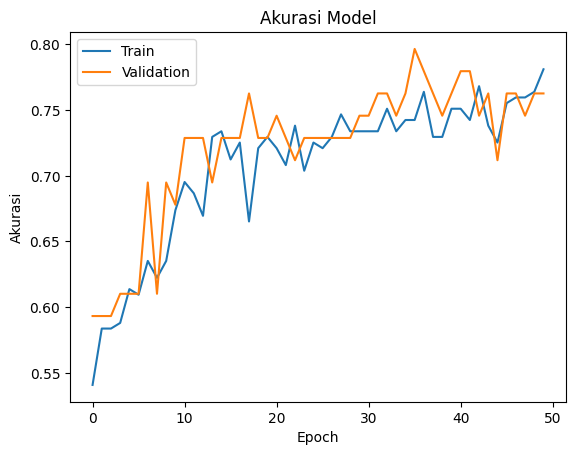

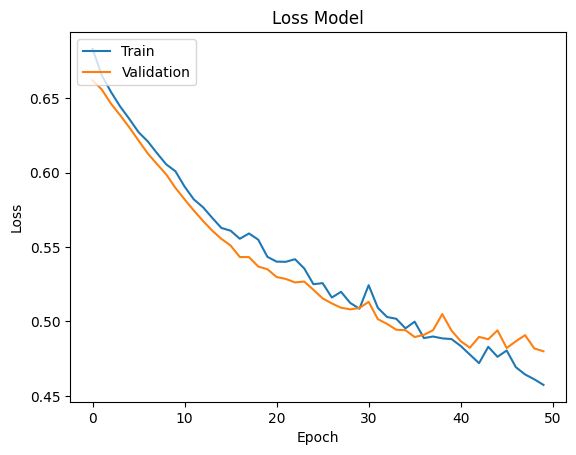

Training Accuracy: 76.39%
Validation Accuracy: 76.27%


In [30]:
# Memilih fitur numerik yang relevan untuk model
features = ['artist_pop', 'danceability', 'energy', 'loudness', 'mode', 'key',
            'speechiness', 'acousticness', 'instrumentalness', 'liveness',
            'valence', 'tempo', 'time_signature', 'duration_ms']
target = 'track_pop'

# Memisahkan dataset menjadi fitur (X) dan target (y)
X = data[features].values
y = data[target].values

# Normalisasi fitur menggunakan MinMaxScaler untuk skala 0 sampai 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Membagi dataset menjadi set pelatihan dan pengujian (80% pelatihan, 20% pengujian)
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Mengonversi 'track_pop' menjadi masalah klasifikasi biner (populer/tidak populer)
y_train = np.where(y_train >= 70, 1, 0)
y_val = np.where(y_val >= 70, 1, 0)

# Membangun model Sequential
model = Sequential()
# Input layer dan dua hidden layer
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
# Output layer (klasifikasi biner)
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Lihat ringkasan model
model.summary()

# Latih model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_val, y_val), verbose=1)

import matplotlib.pyplot as plt

# Plot akurasi pelatihan dan validasi
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('Akurasi')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot loss pelatihan dan validasi
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Evaluasi model pada data pelatihan
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

# Evaluasi model pada data validasi
val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=0)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")
